In [2]:
from IPython.core.interactiveshell import InteractiveShell
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%matplotlib inline 
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
## Data Time Series for stock or financial statment analysis

<!-- PELICAN_BEGIN_SUMMARY -->

Time Series can be useful to analyze financial data in different frequencies based on data distribution.
We can also generate random dates for data testing.

<!-- PELICAN_END_SUMMARY -->

### Example of Amazon stock daily closing prices from 1997 - 2018 in CSV format.

In [4]:
df = pd.read_csv('data/Amazon.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200


In [5]:
# Find out the type of Date: the Date type here is string, not time series
type(df.Date[0])

str

In [6]:
# Convert string into a Time Series by adding Parse to read the CSV file
df = pd.read_csv('data/Amazon.csv', parse_dates=["Date"])
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200


In [7]:
# Date's type is Timestamp as one of time series now
type(df.Date[0])

pandas._libs.tslib.Timestamp

In [8]:
# Set index to date by adding index column to Date
df = pd.read_csv('data/Amazon.csv', parse_dates=["Date"],index_col="Date")
df.index

DatetimeIndex(['1997-05-15', '1997-05-16', '1997-05-19', '1997-05-20',
               '1997-05-21', '1997-05-22', '1997-05-23', '1997-05-27',
               '1997-05-28', '1997-05-29',
               ...
               '2018-05-15', '2018-05-16', '2018-05-17', '2018-05-18',
               '2018-05-21', '2018-05-22', '2018-05-23', '2018-05-24',
               '2018-05-25', '2018-05-29'],
              dtype='datetime64[ns]', name='Date', length=5294, freq=None)

### The benefit of setting indexes is that you can retrieve specific date ranges of Amazon stock prices. 
### In the following example, we retrieved the March 2018 stock prices.

In [9]:
df["2018-03"]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-03-01,1513.599976,1518.489990,1465.000000,1493.449951,1493.449951,6835200
2018-03-02,1469.099976,1501.050049,1455.010010,1500.250000,1500.250000,6587600
2018-03-05,1494.239990,1525.380005,1481.000000,1523.609985,1523.609985,5233900
2018-03-06,1533.199951,1542.130005,1528.000000,1537.640015,1537.640015,4561700
2018-03-07,1526.520020,1545.900024,1522.510010,1545.000000,1545.000000,4174100
2018-03-08,1550.000000,1554.880005,1545.250000,1551.859985,1551.859985,3862600
2018-03-09,1563.500000,1578.939941,1559.079956,1578.890015,1578.890015,4534300
2018-03-12,1592.599976,1605.329956,1586.699951,1598.390015,1598.390015,5174200
2018-03-13,1615.959961,1617.540039,1578.010010,1588.180054,1588.180054,6531900


### Finding the average closing price of Amazon stock in March 2018

In [10]:
df["2018-03"].Close.mean()

1540.367629333333

In [ ]:
# Retrieving one specific day ?? error why? 6/4/18
df["2018-03-21"]  

In [ ]:
# Retrieving with a date range
df["2018-03-01":"2018-03-05"] 

In [16]:
# Yearly average of the stock price
df.Close.resample('Y').mean()

Date
1997-12-31       3.126400
1998-12-31      15.661112
1999-12-31      69.062314
2000-12-31      46.533668
2001-12-31      12.200426
2002-12-31      16.484127
2003-12-31      37.741389
2004-12-31      43.565238
2005-12-31      39.897103
2006-12-31      35.909323
2007-12-31      67.229482
2008-12-31      69.880040
2009-12-31      87.281825
2010-12-31     139.140397
2011-12-31     196.672024
2012-12-31     220.303640
2013-12-31     298.031588
2014-12-31     332.551033
2015-12-31     478.138295
2016-12-31     699.523135
2017-12-31     968.167012
2018-12-31    1469.684801
Freq: A-DEC, Name: Close, dtype: float64

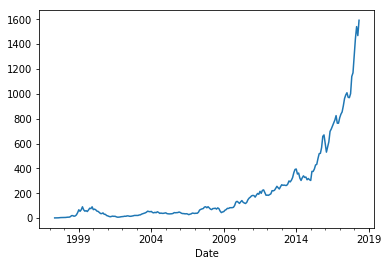

In [15]:
# Average monthly price
df.Close.resample('M').mean().plot()

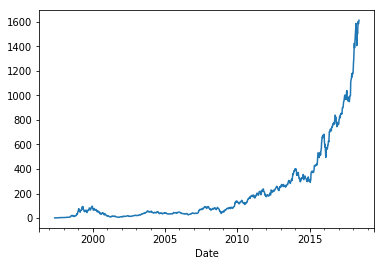

In [20]:
# Average weekly price.. shift+tab to view all the possibilities of the Resample data function
df.Close.resample('W').mean().plot()

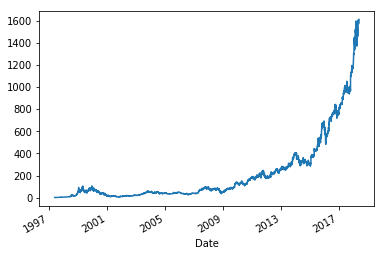

In [22]:
# Without Resample, the chart is more grannuily
df.Close.plot()

### Assigning a date range to the data
### The following example is the April 2018 Amazon stock prices but without any date
- read the stock closing price with the missing date
- assign the date to match the stock price

In [48]:
# Read April 2018 Amazon stock price without date column
df1 = pd.read_csv('data\Amazon_No_Date.csv')
df1

,Open,High,Low,Close,Adj Close,Volume
0,1417.619995,1421.359985,1355.000000,1371.989990,1371.989990,10463600
1,1391.380005,1414.000000,1355.329956,1392.050049,1392.050049,10231200
2,1358.239990,1415.390015,1352.880005,1410.569946,1410.569946,6982300
3,1441.989990,1459.560059,1427.069946,1451.750000,1451.750000,6413500
4,1429.969971,1452.500000,1400.260010,1405.229980,1405.229980,5882300
5,1425.030029,1438.479980,1402.569946,1406.079956,1406.079956,4208200
6,1431.989990,1438.380005,1415.699951,1436.219971,1436.219971,4254100
7,1439.439941,1448.780029,1424.890015,1427.050049,1427.050049,3582500
8,1439.500000,1452.119995,1435.060059,1448.500000,1448.500000,3135000
9,1449.140015,1459.780029,1424.520020,1430.790039,1430.790039,3685300


In [49]:
# Assign the date to match the stock price, the month of April started at 4/1/18 and ended at 4/30/18 with Business days as the frequency
# The Business day function does not consider holidays
rng = pd.date_range(start="4/1/2018", end = "4/30/2018", freq='B')
rng

DatetimeIndex(['2018-04-02', '2018-04-03', '2018-04-04', '2018-04-05',
               '2018-04-06', '2018-04-09', '2018-04-10', '2018-04-11',
               '2018-04-12', '2018-04-13', '2018-04-16', '2018-04-17',
               '2018-04-18', '2018-04-19', '2018-04-20', '2018-04-23',
               '2018-04-24', '2018-04-25', '2018-04-26', '2018-04-27',
               '2018-04-30'],
              dtype='datetime64[ns]', freq='B')

In [50]:
# Set the date column as the index. You must specify "True" to modify the original dataframe
df1.set_index(rng,inplace=True)
df1

,Open,High,Low,Close,Adj Close,Volume
2018-04-02,1417.619995,1421.359985,1355.000000,1371.989990,1371.989990,10463600
2018-04-03,1391.380005,1414.000000,1355.329956,1392.050049,1392.050049,10231200
2018-04-04,1358.239990,1415.390015,1352.880005,1410.569946,1410.569946,6982300
2018-04-05,1441.989990,1459.560059,1427.069946,1451.750000,1451.750000,6413500
2018-04-06,1429.969971,1452.500000,1400.260010,1405.229980,1405.229980,5882300
2018-04-09,1425.030029,1438.479980,1402.569946,1406.079956,1406.079956,4208200
2018-04-10,1431.989990,1438.380005,1415.699951,1436.219971,1436.219971,4254100
2018-04-11,1439.439941,1448.780029,1424.890015,1427.050049,1427.050049,3582500
2018-04-12,1439.500000,1452.119995,1435.060059,1448.500000,1448.500000,3135000
2018-04-13,1449.140015,1459.780029,1424.520020,1430.790039,1430.790039,3685300


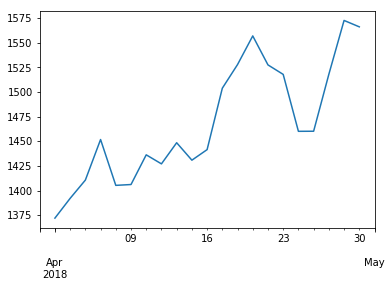

In [51]:
# Chart the stock closing price
df1.Close.plot()

In [52]:
# Average Amazon price between 4/1/18 - 4/10/18
df1["2018-04-01":"2018-04-10"].Close.mean() 

1410.555698857143

In [53]:
# Add weekends to the list. The price would be the same as the previous business day's closing price
df1.asfreq('D', method='pad')

,Open,High,Low,Close,Adj Close,Volume
2018-04-02,1417.619995,1421.359985,1355.000000,1371.989990,1371.989990,10463600
2018-04-03,1391.380005,1414.000000,1355.329956,1392.050049,1392.050049,10231200
2018-04-04,1358.239990,1415.390015,1352.880005,1410.569946,1410.569946,6982300
2018-04-05,1441.989990,1459.560059,1427.069946,1451.750000,1451.750000,6413500
2018-04-06,1429.969971,1452.500000,1400.260010,1405.229980,1405.229980,5882300
2018-04-07,1429.969971,1452.500000,1400.260010,1405.229980,1405.229980,5882300
2018-04-08,1429.969971,1452.500000,1400.260010,1405.229980,1405.229980,5882300
2018-04-09,1425.030029,1438.479980,1402.569946,1406.079956,1406.079956,4208200
2018-04-10,1431.989990,1438.380005,1415.699951,1436.219971,1436.219971,4254100
2018-04-11,1439.439941,1448.780029,1424.890015,1427.050049,1427.050049,3582500


In [54]:
# Change the dataframe to Weekly
df1.asfreq('W', method='pad')

,Open,High,Low,Close,Adj Close,Volume
2018-04-08,1429.969971,1452.500000,1400.260010,1405.229980,1405.229980,5882300
2018-04-15,1449.140015,1459.780029,1424.520020,1430.790039,1430.790039,3685300
2018-04-22,1561.199951,1561.199951,1516.089966,1527.489990,1527.489990,5541600
2018-04-29,1634.010010,1638.099976,1567.390015,1572.619995,1572.619995,13053200


### Generating Dates and Random Data for Testing
- Set the date frequency to 'B' for business days
- Import numpy to generate random numbers
- Set the index to match the random numbers

In [57]:
## Generating 60 business days starting from 1/1/2018
rng = pd.date_range(start='1/1/2018', periods=60, freq='B')
rng

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-08', '2018-01-09', '2018-01-10',
               '2018-01-11', '2018-01-12', '2018-01-15', '2018-01-16',
               '2018-01-17', '2018-01-18', '2018-01-19', '2018-01-22',
               '2018-01-23', '2018-01-24', '2018-01-25', '2018-01-26',
               '2018-01-29', '2018-01-30', '2018-01-31', '2018-02-01',
               '2018-02-02', '2018-02-05', '2018-02-06', '2018-02-07',
               '2018-02-08', '2018-02-09', '2018-02-12', '2018-02-13',
               '2018-02-14', '2018-02-15', '2018-02-16', '2018-02-19',
               '2018-02-20', '2018-02-21', '2018-02-22', '2018-02-23',
               '2018-02-26', '2018-02-27', '2018-02-28', '2018-03-01',
               '2018-03-02', '2018-03-05', '2018-03-06', '2018-03-07',
               '2018-03-08', '2018-03-09', '2018-03-12', '2018-03-13',
               '2018-03-14', '2018-03-15', '2018-03-16', '2018-03-19',
      

In [58]:
# Import numpy to generate random numbers between 1 to 20 for the length of 60 days
import numpy as np
np.random.randint(1,20,len(rng))

array([17,  9,  5,  8,  1,  3,  1,  7, 10, 16,  8,  9, 10,  2,  2, 12,  6,
        8, 17,  3,  6,  3,  5, 10,  2,  8, 17, 16,  4, 15, 16,  9,  9,  1,
       18,  5, 16,  5,  8,  5,  9, 14, 16,  6,  5, 19, 11, 13, 17,  6, 14,
       18,  6,  1,  3, 13, 16,  6, 16, 14])

In [59]:
# Set index to match the random numbers
ts = pd.Series(np.random.randint(1,20,len(rng)), index=rng)
ts.head()

2018-01-01    11
2018-01-02    10
2018-01-03    19
2018-01-04    14
2018-01-05    14
Freq: B, dtype: int32